In [1]:
import numpy as np # linear algebra
print("1")
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)  
print("2")
import matplotlib.pyplot as plt # plotting
print("3")
from scipy import stats # statistics
print("4")
import math
print("5")

plt.style.use('seaborn-whitegrid')
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
      titleweight='bold', titlesize=18, titlepad=10)
plt.rcParams['figure.figsize'] = [18,10]

1
2
3
4
5


In [12]:
data_set = pd.read_csv('iris.csv')
print(data_set.shape)
data_set.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
species_key = data_set['species'].unique()
print(species_key)

['setosa' 'versicolor' 'virginica']


In [69]:
data_set['sepel_ratio'] = data_set['sepal_length']/data_set['sepal_width']
data_set['petal_ratio'] = data_set['petal_length']/data_set['petal_width']
data_set.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepel_ratio,petal_ratio
0,5.1,3.5,1.4,0.2,setosa,1.457143,7.0
1,4.9,3.0,1.4,0.2,setosa,1.633333,7.0
2,4.7,3.2,1.3,0.2,setosa,1.468750,6.5
3,4.6,3.1,1.5,0.2,setosa,1.483871,7.5
4,5.0,3.6,1.4,0.2,setosa,1.388889,7.0


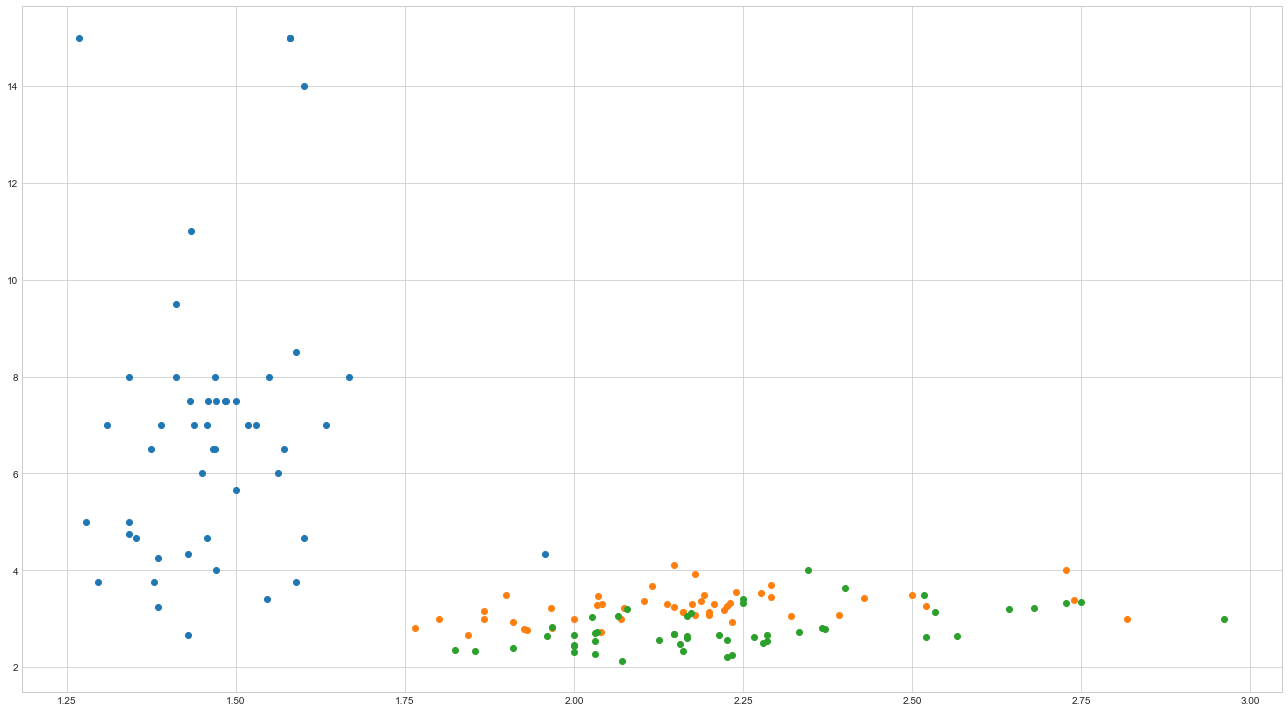

In [80]:
plt.scatter(data_set['sepel_ratio'][0:49], data_set['petal_ratio'][0:49])
plt.scatter(data_set['sepel_ratio'][50:99], data_set['petal_ratio'][50:99])
plt.scatter(data_set['sepel_ratio'][100:150], data_set['petal_ratio'][100:150])
plt.show()

In [84]:
from sklearn.decomposition import PCA

data_pca = PCA(n_components=2).fit_transform(data_set.iloc[:,:4])

In [103]:
data_pca[0:10,0]

array([-2.68420713, -2.71539062, -2.88981954, -2.7464372 , -2.72859298,
       -2.27989736, -2.82089068, -2.62648199, -2.88795857, -2.67384469])

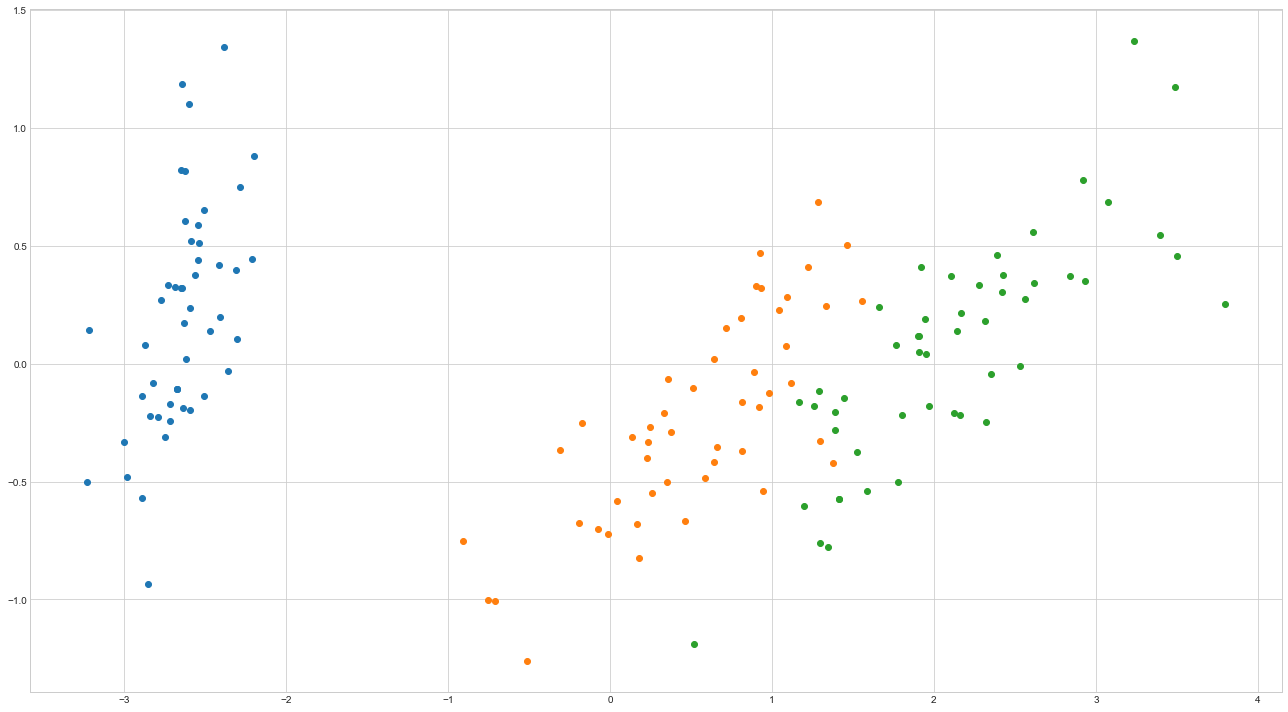

In [105]:
set_0 = data_pca[0:49,0];
set_1 = data_pca[0:49,1];
plt.scatter(set_0, set_1)

set_0 = data_pca[50:99,0];
set_1 = data_pca[50:99,1];
plt.scatter(set_0, set_1)

set_0 = data_pca[100:150,0];
set_1 = data_pca[100:150,1];
plt.scatter(set_0, set_1)
#plt.scatter(data_pca[50:99,0], data_set[50:99,1])
#plt.scatter(data_set[100:150,0], data_set[100:150,1])
plt.show()

In [113]:
import sklearn.preprocessing as prepro 

data_norm = prepro.normalize(data_set.iloc[:,:4], norm='l2')
data_pca_norm = PCA(n_components=2).fit_transform(data_norm)

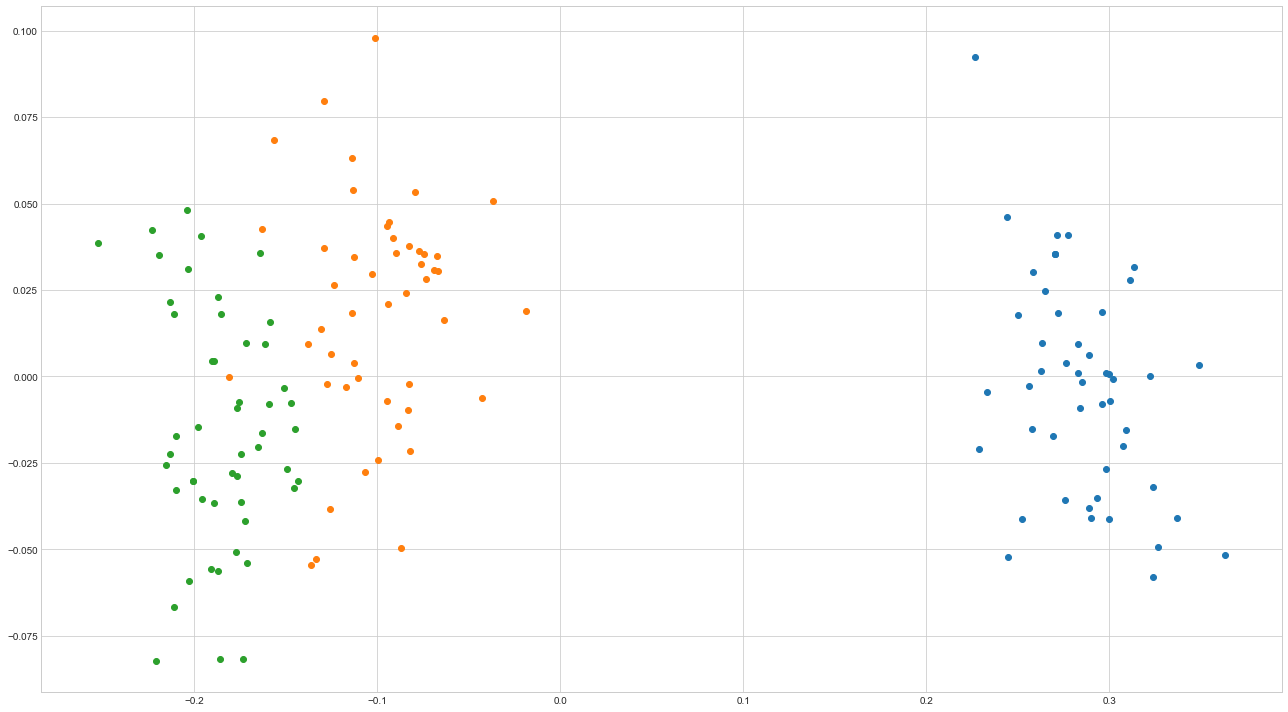

In [114]:
set_0 = data_pca_norm[0:49,0];
set_1 = data_pca_norm[0:49,1];
plt.scatter(set_0, set_1)

set_0 = data_pca_norm[50:99,0];
set_1 = data_pca_norm[50:99,1];
plt.scatter(set_0, set_1)

set_0 = data_pca_norm[100:150,0];
set_1 = data_pca_norm[100:150,1];
plt.scatter(set_0, set_1)
#plt.scatter(data_pca[50:99,0], data_set[50:99,1])
#plt.scatter(data_set[100:150,0], data_set[100:150,1])
plt.show()

In [115]:
from sklearn.decomposition import FastICA

data_ica = FastICA(n_components=2).fit_transform(data_set.iloc[:,:4])

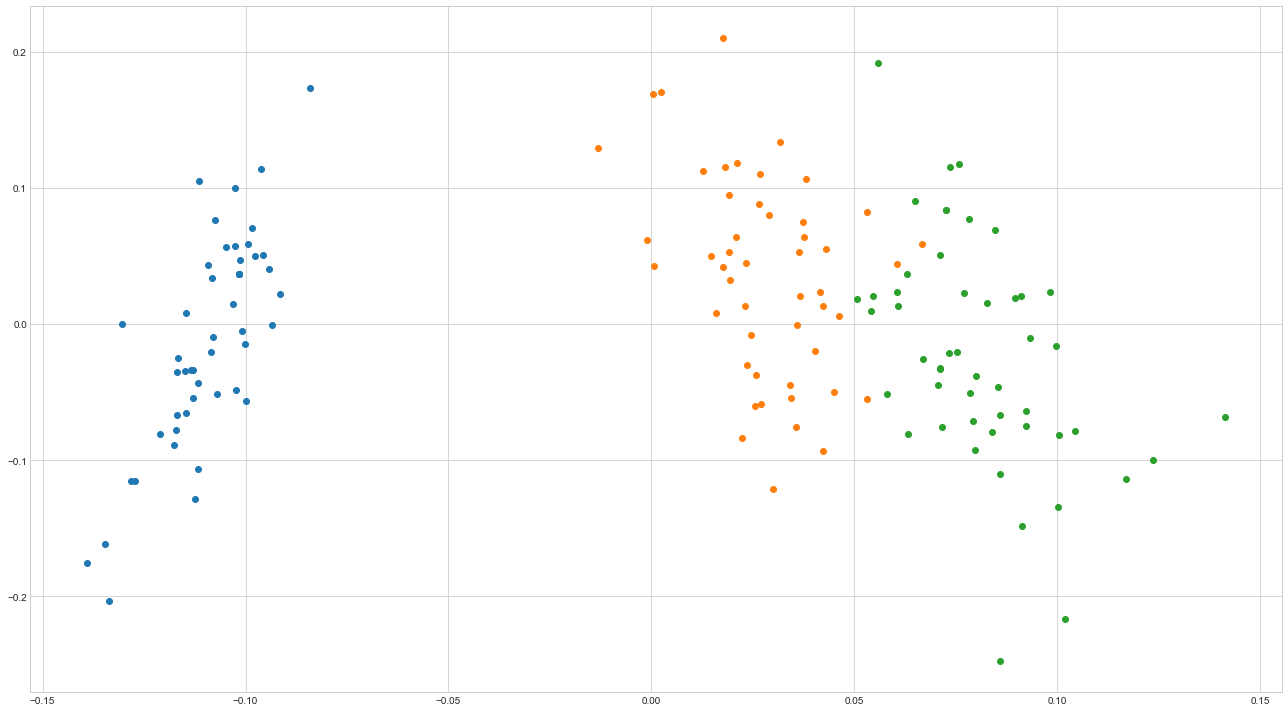

In [116]:
set_0 = data_ica[0:49,0];
set_1 = data_ica[0:49,1];
plt.scatter(set_0, set_1)

set_0 = data_ica[50:99,0];
set_1 = data_ica[50:99,1];
plt.scatter(set_0, set_1)

set_0 = data_ica[100:150,0];
set_1 = data_ica[100:150,1];
plt.scatter(set_0, set_1)
#plt.scatter(data_pca[50:99,0], data_set[50:99,1])
#plt.scatter(data_set[100:150,0], data_set[100:150,1])
plt.show()

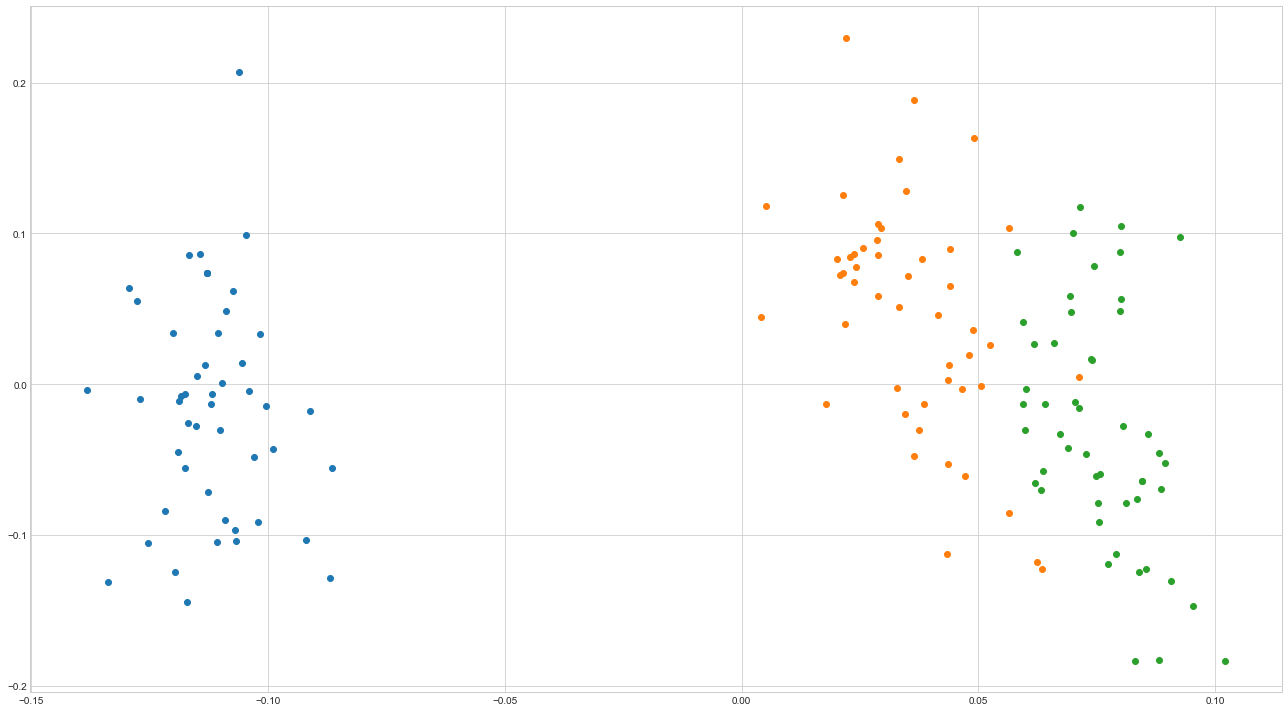

In [119]:
data_ica_norm = FastICA(n_components=2).fit_transform(data_norm)

set_0 = data_ica_norm[0:49,0];
set_1 = data_ica_norm[0:49,1];
plt.scatter(set_0, set_1)

set_0 = data_ica_norm[50:99,0];
set_1 = data_ica_norm[50:99,1];
plt.scatter(set_0, set_1)

set_0 = data_ica_norm[100:150,0];
set_1 = data_ica_norm[100:150,1];
plt.scatter(set_0, set_1)
#plt.scatter(data_pca[50:99,0], data_set[50:99,1])
#plt.scatter(data_set[100:150,0], data_set[100:150,1])
plt.show()

In [117]:
set_0 = data_pca[:,0] - data_ica[:,0];
set_1 = data_pca[:,1] - data_ica[:,1];

print(sum(set_0))
print(sum(set_1))

-2.886579864025407e-14
-8.83182416089312e-14


In [120]:
set_0 = data_pca_norm[:,0] - data_ica_norm[:,0];
set_1 = data_pca_norm[:,1] - data_ica_norm[:,1];

print(sum(set_0))
print(sum(set_1))

2.9837243786801082e-15
3.885780586188048e-15


In [56]:
train_data  = pd.DataFrame(columns = data_set.columns)
test_data  = pd.DataFrame(columns = data_set.columns)
key_indx = 0;

for key in species_key:
    
    print(key)
    tot = (data_set.species == key).sum()
    train_tot = math.floor(tot*.8)
    #test_tot = tot - train_tot

    train_data = pd.concat([train_data, data_set.iloc[key_indx:key_indx+train_tot,:]])
    #print(train_data)
    test_data = pd.concat([test_data, data_set.iloc[key_indx+train_tot+1:key_indx+tot,:]])
    key_indx = key_indx + tot +1
    print(key_indx)

print("Training data size:")
print(train_data.shape)
print("Testing data size:")
print(test_data.shape)

setosa
51
versicolor
102
virginica
153
Training data size:
(120, 5)
Testing data size:
(25, 5)


In [67]:
#unuseful, use k means
#from sklearn.neural_network import MLPClassifier

#clf = MLPClassifier(random_state=1)
#clf.fit(train_data.iloc[:,:4], train_data.iloc[:,-1])
#print("Model trained")
#score = clf.score(test_data.iloc[:,:4], test_data.iloc[:,-1])
#print(score)

#pred = clf.predict(test_data.iloc[:,:4])
#print(pred)
#print(test_data.iloc[:,-1])